In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('startup_funding.csv')

df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [4]:
df.describe(include='all')

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
count,3044.000000,3044,3044,2873,2108,2864,3020,3040,2084,419
unique,NaN,1035,2459,821,1942,112,2412,55,471,72
top,NaN,30/11/2016,Swiggy,Consumer Internet,Online Lending Platform,Bangalore,Undisclosed Investors,Private Equity,"10,00,000",Series A
freq,NaN,11,8,941,11,700,39,1356,165,175
mean,1522.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,878.871435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,761.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1522.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2283.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [6]:
df.columns = df.columns.str.strip().str.replace(' ', '_')


In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Rename specific columns for clarity
df = df.rename(columns={
    'date_dd/mm/yyyy': 'date',
    'startup_name': 'startup',
    'industry_vertical': 'industry',
    'city__location': 'city',
    'investors_name': 'investors',
    'investmentntype': 'investment_type',
    'amount_in_usd': 'amount_usd'
})

df[['startup', 'industry', 'city', 'investors', 'investment_type', 'amount_usd', 'date']].sample(5)

,startup,industry,city,investors,investment_type,amount_usd,date
1078,Direct Create,eCommerce,Gurgaon,Rajasthan Venture Capital Fund,Seed Funding,NaN,18/01/2017
45,Progcap,Finance,New Delhi,Sequoia India,Series A,"50,00,000",01/08/2019
854,Eruditus,Education,Mumbai,Bertelsmann India,Private Equity,"82,00,000",03/04/2017
1665,Mobikwik,Consumer Internet,Gurgaon,"GMO Payment Gateway, MediaTek",Private Equity,"5,00,00,000",03/05/2016
405,Newgen Software,Technology,New Delhi,"Goldman Sachs, hedge fund & Others",Private Equity,"2,00,00,000",15/01/2018


In [8]:
df.head()

,sr_no,date,startup,industry,subvertical,city,investors,investment_type,amount_usd,remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [9]:
# Remove commas and convert to float
df['amount_usd'] = df['amount_usd'].str.replace(',', '')
df['amount_usd'] = pd.to_numeric(df['amount_usd'], errors='coerce')

In [10]:
df['date'] = pd.to_datetime(df['date'], errors='coerce', dayfirst=True)

In [11]:
df['year'] = df['date'].dt.year

In [12]:
df['city'] = df['city'].str.strip().str.title()
df['industry'] = df['industry'].str.strip().str.title()
df['investors'] = df['investors'].str.strip()
df['investment_type'] = df['investment_type'].str.strip().str.title()


In [13]:
df.isnull().sum()

sr_no                 0
date                  8
startup               0
industry            171
subvertical         936
city                180
investors            24
investment_type       4
amount_usd          979
remarks            2625
year                  8
dtype: int64

In [14]:
df = df.dropna(subset=['amount_usd', 'date'])


In [15]:
df.head()

,sr_no,date,startup,industry,subvertical,city,investors,investment_type,amount_usd,remarks,year
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,NaN,2020.0
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,NaN,2020.0
2,3,2020-01-09,Mamaearth,E-Commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,NaN,2020.0
3,4,2020-01-02,https://www.wealthbucket.in/,Fintech,Online Investment,New Delhi,Vinod Khatumal,Pre-Series A,3000000.0,NaN,2020.0
4,5,2020-01-02,Fashor,Fashion And Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,NaN,2020.0


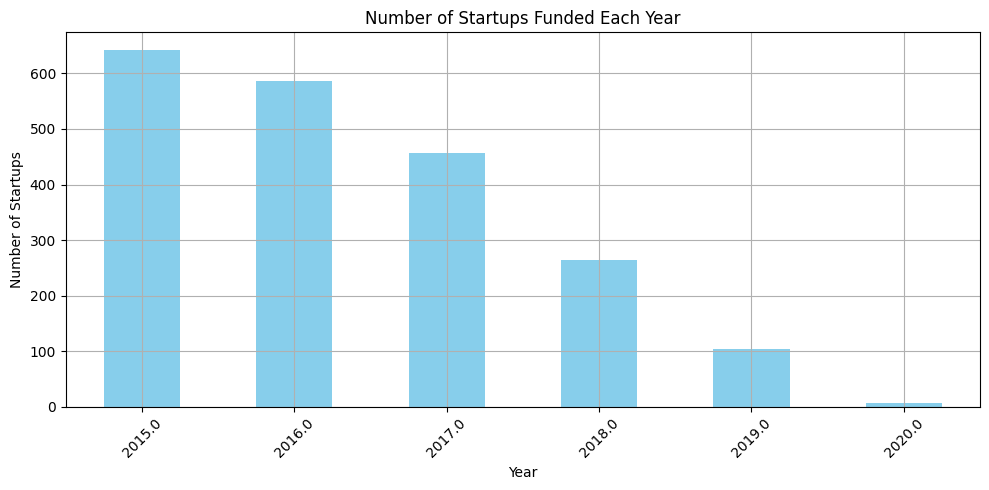

In [16]:
#Startups funded per year
startup_per_year = df['year'].value_counts().sort_index()
startup_per_year.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Number of Startups Funded Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

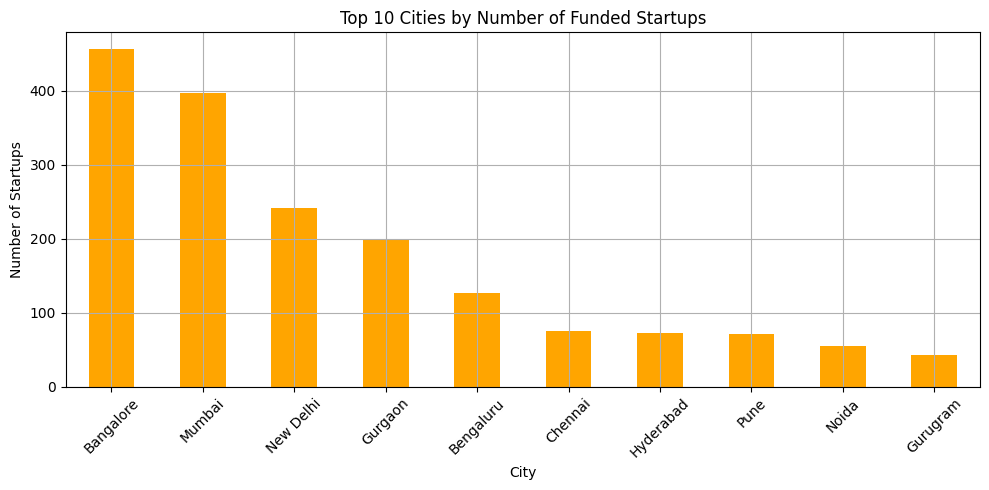

In [17]:
#top 10 funded cities
top_cities = df['city'].value_counts().head(10)
top_cities.plot(kind='bar', figsize=(10, 5), color='orange')
plt.title('Top 10 Cities by Number of Funded Startups')
plt.xlabel('City')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

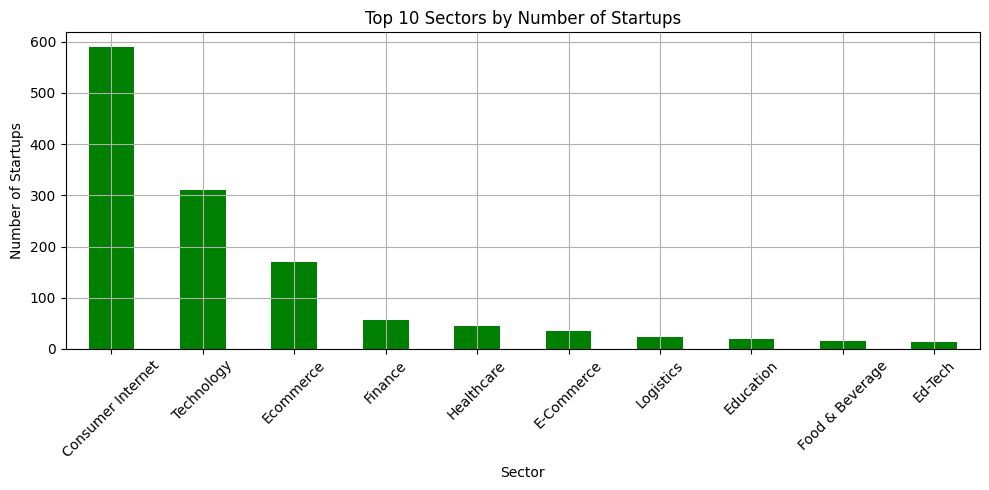

In [18]:
#Most Popular Sectors
top_sectors = df['industry'].value_counts().head(10)
top_sectors.plot(kind='bar', figsize=(10, 5), color='green')
plt.title('Top 10 Sectors by Number of Startups')
plt.xlabel('Sector')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

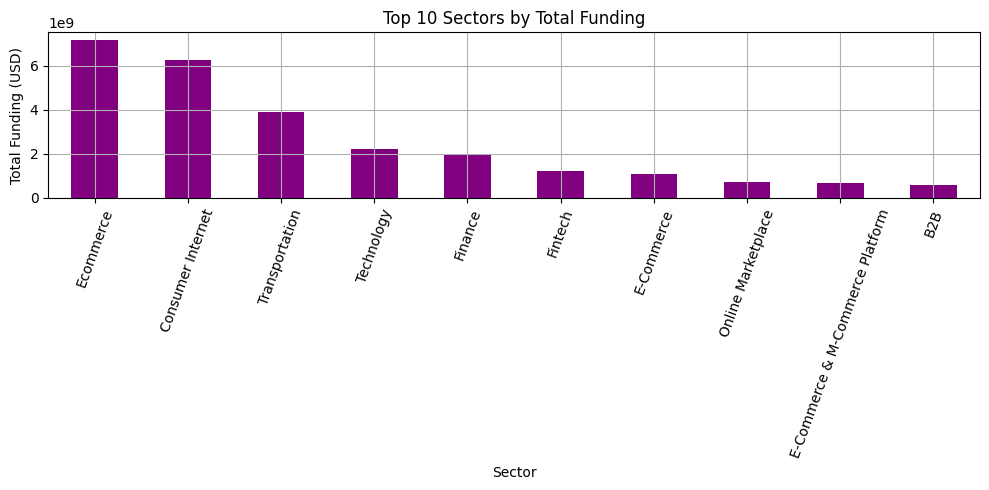

In [19]:
#total funding received
funding_by_sector = df.groupby('industry')['amount_usd'].sum().sort_values(ascending=False).head(10)
funding_by_sector.plot(kind='bar', figsize=(10, 5), color='purple')
plt.title('Top 10 Sectors by Total Funding')
plt.xlabel('Sector')
plt.ylabel('Total Funding (USD)')
plt.xticks(rotation=70)
plt.grid(True)
plt.tight_layout()
plt.show()

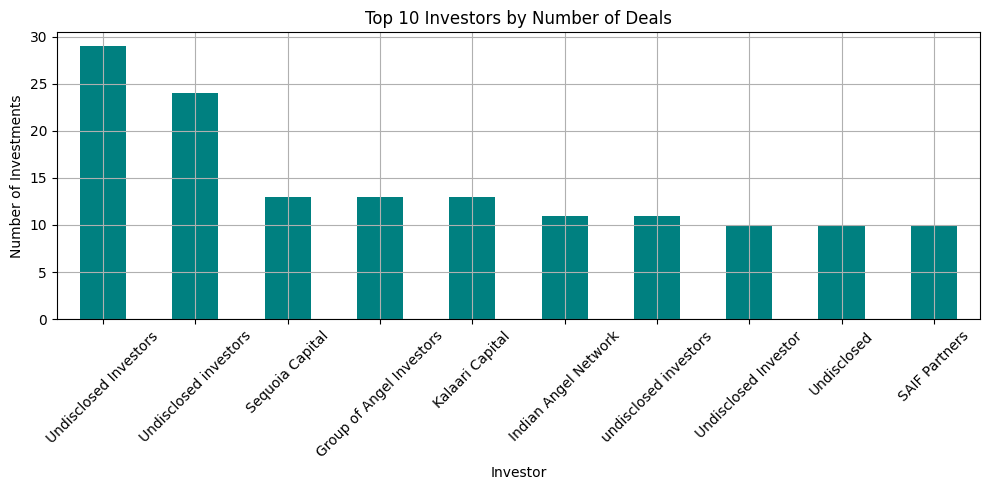

In [20]:
#top 10 investors by no. by deals
top_investors = df['investors'].value_counts().head(10)
top_investors.plot(kind='bar', figsize=(10, 5), color='teal')
plt.title('Top 10 Investors by Number of Deals')
plt.xlabel('Investor')
plt.ylabel('Number of Investments')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

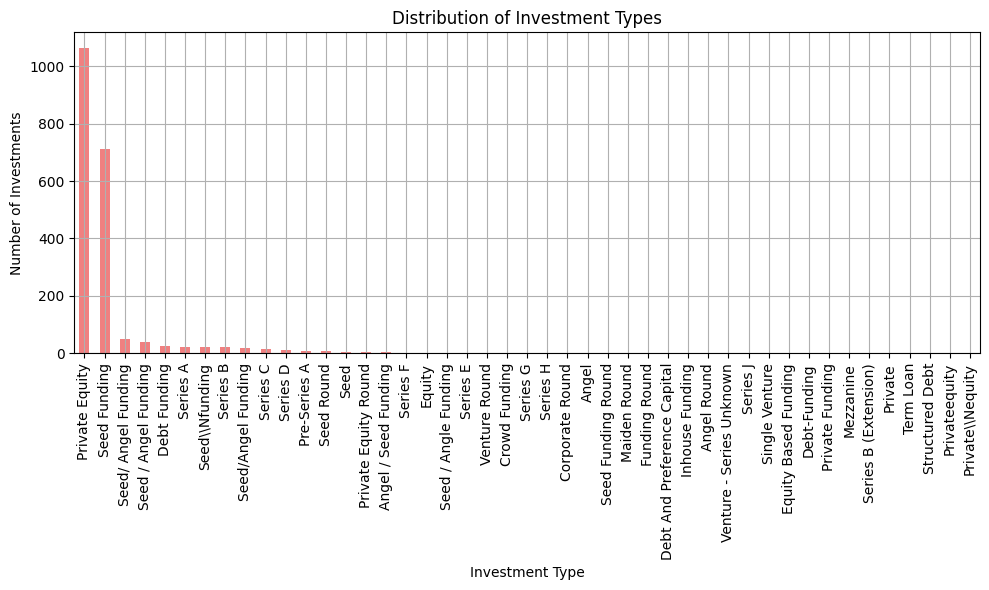

In [21]:
#Most Common Investment Types
investment_counts = df['investment_type'].value_counts()
investment_counts.plot(kind='bar', figsize=(10, 6), color='lightcoral')
plt.title('Distribution of Investment Types')
plt.xlabel('Investment Type')
plt.ylabel('Number of Investments')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

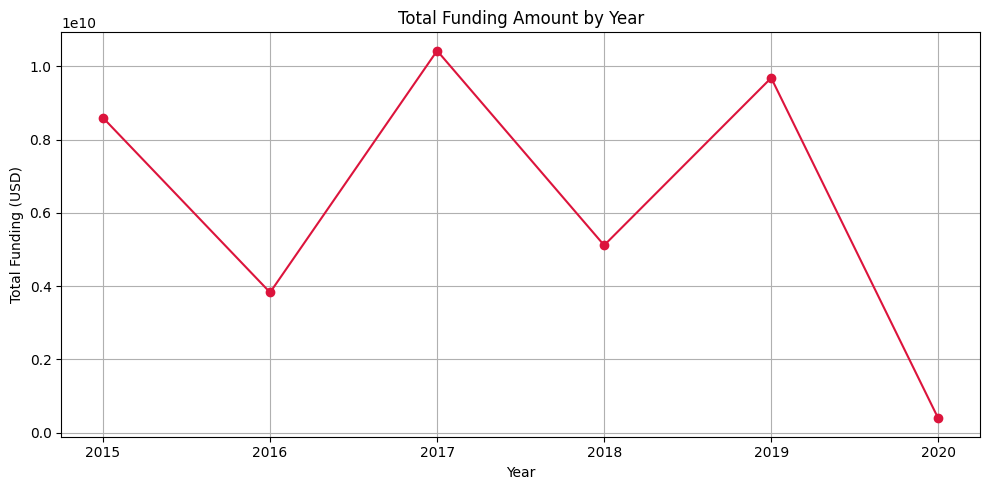

In [22]:
#Yearly Funding Trend (Total Amount)
funding_trend = df.groupby('year')['amount_usd'].sum()
funding_trend.plot(kind='line', marker='o', figsize=(10, 5), color='crimson')
plt.title('Total Funding Amount by Year')
plt.xlabel('Year')
plt.ylabel('Total Funding (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

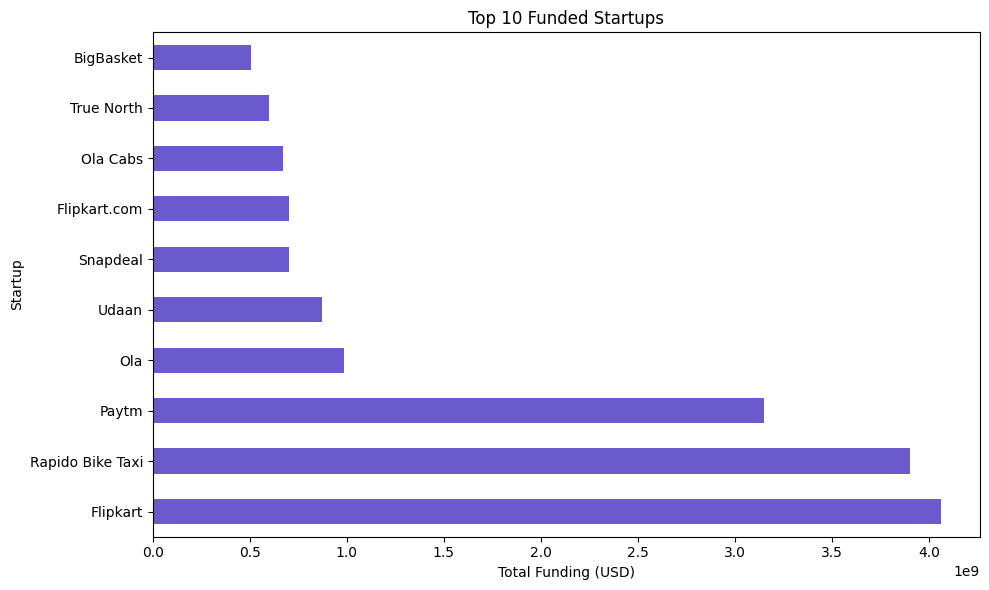

In [23]:
#Top 10 Startups by Funding Received
top_startups = df.groupby('startup')['amount_usd'].sum().sort_values(ascending=False).head(10)
top_startups.plot(kind='barh', figsize=(10, 6), color='slateblue')
plt.title('Top 10 Funded Startups')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Startup')
plt.tight_layout()
plt.show()